In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from datetime import  date
import seaborn as sns
# 데이터 로드
data = pd.read_csv('c:\pg\project\drop_dataset.csv')

In [23]:
data.shape

(17963, 31)

In [24]:
data.head()

,Unnamed: 0,cust_id,transaction_date,subscription_price,subscription_type_BASIC,subscription_type_MAX,subscription_type_PRO,customer_country_Denmark,customer_country_Finland,customer_country_Norway,...,referral_type_Organic Search,referral_type_Paid Search,referral_type_TV,referral_type_Unknown,referral_type_facebook,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-65
0,0,1,2020-09-01,33,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,2,2022-03-01,53,True,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
2,2,3,2020-10-01,99,False,True,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
3,3,3,2022-02-01,53,True,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
4,4,4,2022-05-01,85,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [25]:
data.columns

Index(['Unnamed: 0', 'cust_id', 'transaction_date', 'subscription_price',
       'subscription_type_BASIC', 'subscription_type_MAX',
       'subscription_type_PRO', 'customer_country_Denmark',
       'customer_country_Finland', 'customer_country_Norway',
       'customer_country_Sweden', 'transaction_type_CHURN',
       'transaction_type_REDUCTION', 'transaction_type_UPGRADE',
       'transaction_type_initial', 'customer_gender_Female',
       'customer_gender_Male', 'customer_gender_Other', 'referral_type_Bing',
       'referral_type_Display', 'referral_type_Google Ads',
       'referral_type_Organic Search', 'referral_type_Paid Search',
       'referral_type_TV', 'referral_type_Unknown', 'referral_type_facebook',
       'age_group_18-24', 'age_group_25-34', 'age_group_35-44',
       'age_group_45-54', 'age_group_55-65'],
      dtype='object')

연월별

C:\Users\USER\AppData\Local\Temp\ipykernel_19320\4062572667.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHURN_data['transaction_date'] = pd.to_datetime(CHURN_data['transaction_date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_19320\4062572667.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  REDUCTION_data['transaction_date'] = pd.to_datetime(REDUCTION_data['transaction_date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_19320\4062572667.py:16: SettingWithCopyWarning: 
A value is trying to be se

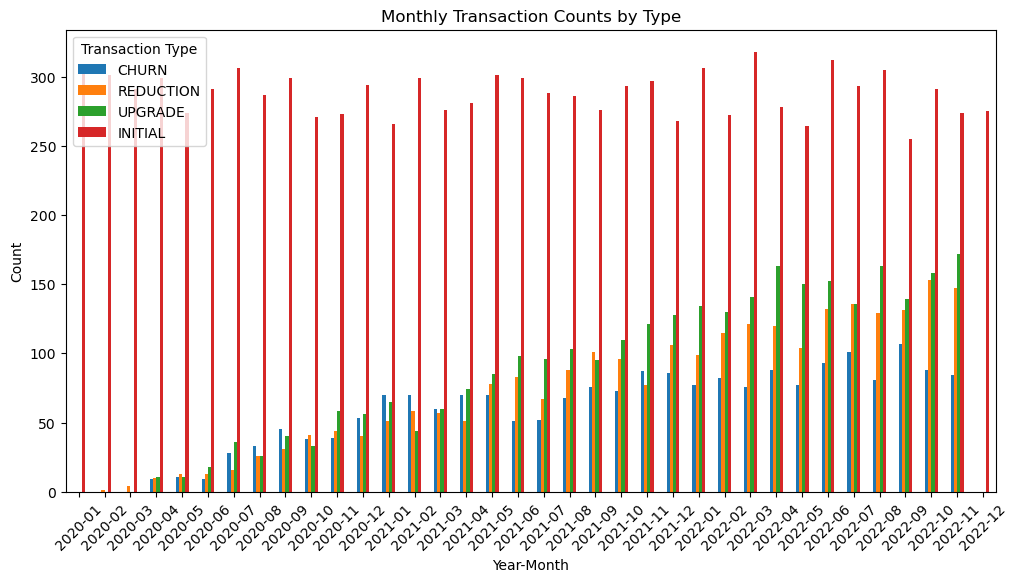

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비


# 각 종류별 데이터 필터링
CHURN_data = data[data['transaction_type_CHURN'] == True]
REDUCTION_data = data[data['transaction_type_REDUCTION'] == True]
UPGRADE_data = data[data['transaction_type_UPGRADE'] == True]
initial_data = data[data['transaction_type_initial'] == True]

data['transaction_date'] = pd.to_datetime(data['transaction_date'])
CHURN_data['transaction_date'] = pd.to_datetime(CHURN_data['transaction_date'])
REDUCTION_data['transaction_date'] = pd.to_datetime(REDUCTION_data['transaction_date'])
UPGRADE_data['transaction_date'] = pd.to_datetime(UPGRADE_data['transaction_date'])
initial_data['transaction_date'] = pd.to_datetime(initial_data['transaction_date'])

# 연월별로 그룹화하고 개수 세기
CHURN_counts = CHURN_data.groupby(CHURN_data['transaction_date'].dt.to_period('M')).size()
REDUCTION_counts = REDUCTION_data.groupby(REDUCTION_data['transaction_date'].dt.to_period('M')).size()
UPGRADE_counts = UPGRADE_data.groupby(UPGRADE_data['transaction_date'].dt.to_period('M')).size()
initial_counts = initial_data.groupby(initial_data['transaction_date'].dt.to_period('M')).size()


counts_df = pd.DataFrame({
    'CHURN': CHURN_counts,
    'REDUCTION': REDUCTION_counts,
    'UPGRADE': UPGRADE_counts,
    'INITIAL': initial_counts
}).fillna(0)

# 바 그래프로 시각화
counts_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Monthly Transaction Counts by Type')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.show()

분기별 

In [41]:


CHURN_counts2 = CHURN_data.groupby(CHURN_data['transaction_date'].dt.to_period('Q')).size()
REDUCTION_counts2 = REDUCTION_data.groupby(REDUCTION_data['transaction_date'].dt.to_period('Q')).size()
UPGRADE_counts2 = UPGRADE_data.groupby(UPGRADE_data['transaction_date'].dt.to_period('Q')).size()
initial_counts2 = initial_data.groupby(initial_data['transaction_date'].dt.to_period('Q')).size()




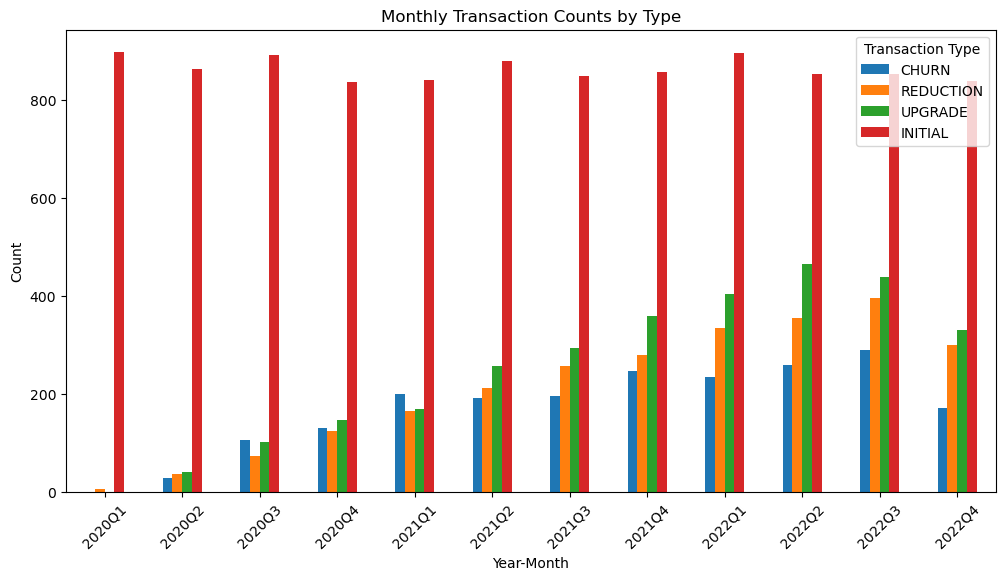

In [61]:
# transaction_type에 따라 집계
counts_df2 = pd.DataFrame({
    'CHURN': CHURN_counts2,
    'REDUCTION': REDUCTION_counts2,
    'UPGRADE': UPGRADE_counts2,
    'INITIAL': initial_counts2
    
}).fillna(0)



# 바 그래프로 시각화
counts_df2.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Monthly Transaction Counts by Type')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.show()